In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import starling
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [3]:
# load data
rate, data = starling()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 15000, rate)

In [4]:
figsize = (20,3)

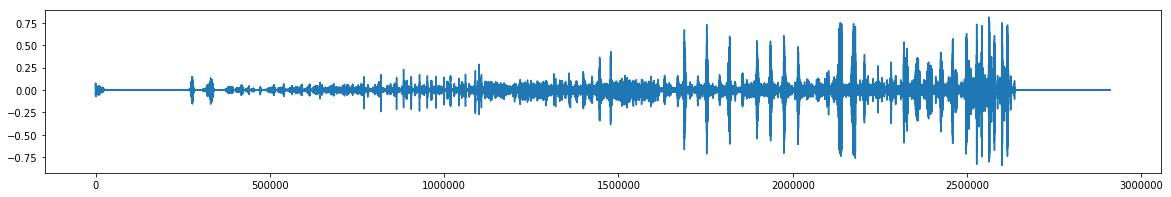

In [5]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram

In [6]:
### parameters
n_fft=1024
hop_length_ms=1
win_length_ms=5
ref_level_db=20
pre=0.97
min_level_db=-100
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.25

In [7]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(513, 66140)

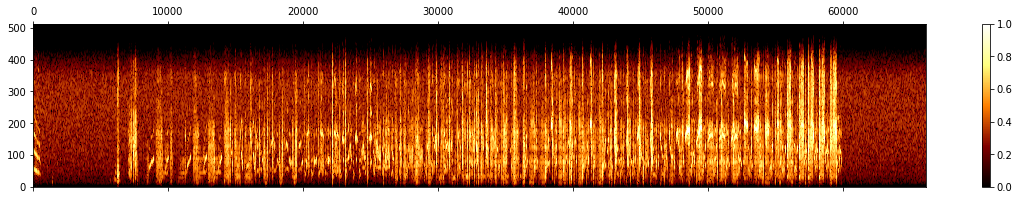

In [8]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### generate spectrogram using dynamic thresholding

In [9]:
from vocalseg.dynamic_thresholding import dynamic_threshold_segmentation

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [10]:
results = dynamic_threshold_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    silence_threshold = silence_threshold,
    verbose=True,
    min_syllable_length_s = min_syllable_length_s
)
#print(len(results['onsets']))

/mnt/cube/tsainbur/Projects/github_repos/vocalization_segmentation/vocalseg/dynamic_thresholding.py:125: RuntimeWarning: invalid value encountered in sqrt
  vocal_envelope = np.max(spec, axis=0) * np.sqrt(np.mean(spec, axis=0))


longest silence 0.14000000000000057
longest vocalization 1.0579999999999998
Current min_level_db: -100
longest silence 0.14000000000000057
longest vocalization 1.0419999999999998
Current min_level_db: -95
longest silence 0.14000000000000057
longest vocalization 1.0419999999999998
Current min_level_db: -90
longest silence 0.16100000000000003
longest vocalization 1.0419999999999998
Current min_level_db: -85
longest silence 0.16999999999999993
longest vocalization 0.9059999999999988


In [118]:
figsize = (100, 4)

In [119]:
from vocalseg.dynamic_thresholding import plot_segmented_spec, plot_segmentations

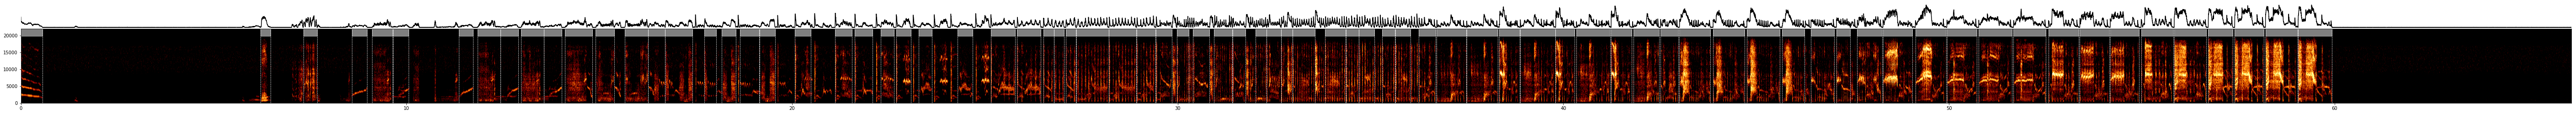

In [123]:
plot_segmentations(
    results["spec"],
    vocal_envelope=results["vocal_envelope"],
    onsets=results["onsets"],
    offsets=results["offsets"],
    rate=rate,
    hop_length_ms=hop_length_ms,
    figsize=figsize,
)

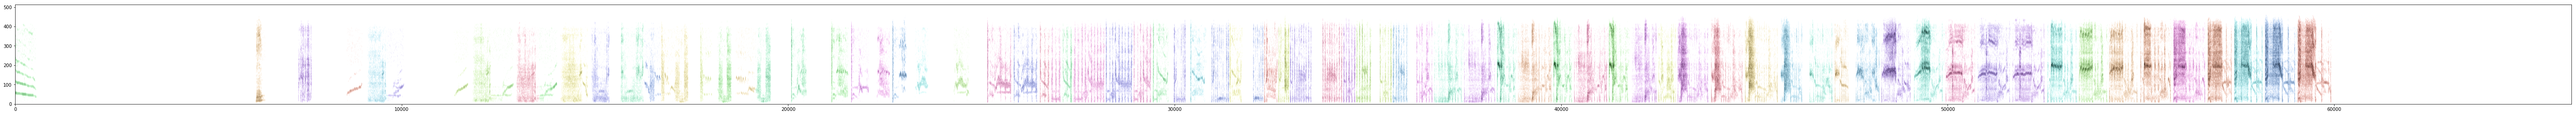

In [121]:
plot_segmented_spec(
    spec=results["spec"].copy(),
    onsets=results["onsets"].copy(),
    offsets=results["offsets"].copy(),
    hop_length_ms = hop_length_ms,
    background="white",
    figsize=figsize
)

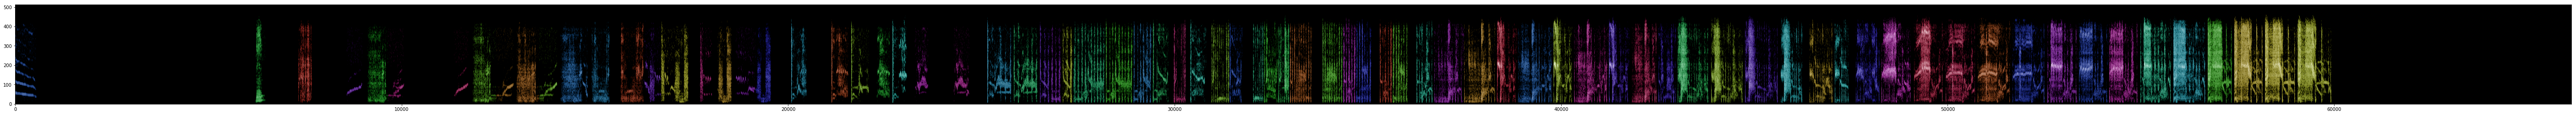

In [122]:
plot_segmented_spec(
    spec=results["spec"].copy(),
    onsets=results["onsets"].copy(),
    offsets=results["offsets"].copy(),
    hop_length_ms = hop_length_ms,
    background="black",
    figsize=figsize
)

In [89]:
.5**2

0.25